<a href="https://colab.research.google.com/github/ajlukasiewicz/Team_9_MacLearn/blob/Muyoung/decisionTree_randomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import io

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
#from sklearn.metrics import roc_auc_score

# Data uploading and cleaning

In [2]:
#from google.colab import files
#uploaded = files.upload()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
dbcan = pd.read_csv("/content/drive/MyDrive/sds384_team_project/dbcan_result.3772genomes.matrix.divided_by_gene_counts.tsv", sep="\t")
print(dbcan.shape)
dbcan.head()

(3772, 352)


,taxonID,Order,Classification,Root_info,AA1,AA10,AA12,AA3,AA4,AA5,...,PL39,PL4,PL40,PL41,PL42,PL5,PL6,PL7,PL8,PL9
0,2511231155,Acinetobacter,NPA,NPA,0.000252,0.0,0.000000,0.000252,0.000252,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2519103115,Acinetobacter,NPA,NPA,0.000265,0.0,0.000265,0.000265,0.000265,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2519899735,Acinetobacter,NPA,NPA,0.000262,0.0,0.000262,0.000262,0.000262,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2526164562,Acinetobacter,NPA,NPA,0.000495,0.0,0.000000,0.000248,0.000248,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2529293005,Acinetobacter,NPA,NPA,0.000263,0.0,0.000263,0.000263,0.000263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
cog = pd.read_csv("/content/drive/MyDrive/sds384_team_project/cog_ratios.csv")
print(cog.shape)
# Remove rows without gene counts
cog = cog[cog["Gene_Count___*_assembled"] > 0]
print(cog.shape)
cog.head()

(3837, 4216)
(3772, 4216)


,Unnamed: 0,2016_taxon_oid,COG0001,COG0002,COG0003,COG0004,COG0005,COG0006,COG0007,COG0008,...,COG5658,COG5659,COG5660,COG5661,COG5662,COG5663,COG5664,Classification,Horizontally_Transferred_%,Gene_Count___*_assembled
0,0,637000018,0.000340,0.000170,0.000170,0.000170,0.000170,0.000680,0.000340,0.000170,...,0.00017,0.0,0.0,0.0,0.000000,0.00017,0.0,NPA,0.66,5886.0
1,1,637000023,0.000367,0.000183,0.000183,0.000183,0.000183,0.000734,0.000367,0.000183,...,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,NPA,0.24,5452.0
2,2,637000028,0.000000,0.000736,0.000000,0.000000,0.000000,0.000736,0.000000,0.001472,...,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,NPA,4.34,1359.0
3,3,637000046,0.000301,0.000301,0.000000,0.000301,0.000000,0.000603,0.000452,0.000301,...,0.00000,0.0,0.0,0.0,0.000301,0.00000,0.0,NPA,0.20,6637.0
4,4,637000047,0.000297,0.000297,0.000000,0.000297,0.000000,0.000594,0.000445,0.000297,...,0.00000,0.0,0.0,0.0,0.000445,0.00000,0.0,PA,1.93,6738.0


In [16]:
del cog["Classification"]
del cog["Gene_Count___*_assembled"]
print(cog.shape)
cog.head()

(3772, 4214)


,Unnamed: 0,2016_taxon_oid,COG0001,COG0002,COG0003,COG0004,COG0005,COG0006,COG0007,COG0008,...,COG5654,COG5655,COG5658,COG5659,COG5660,COG5661,COG5662,COG5663,COG5664,Horizontally_Transferred_%
0,0,637000018,0.000340,0.000170,0.000170,0.000170,0.000170,0.000680,0.000340,0.000170,...,0.000000,0.0,0.00017,0.0,0.0,0.0,0.000000,0.00017,0.0,0.66
1,1,637000023,0.000367,0.000183,0.000183,0.000183,0.000183,0.000734,0.000367,0.000183,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.24
2,2,637000028,0.000000,0.000736,0.000000,0.000000,0.000000,0.000736,0.000000,0.001472,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,4.34
3,3,637000046,0.000301,0.000301,0.000000,0.000301,0.000000,0.000603,0.000452,0.000301,...,0.000151,0.0,0.00000,0.0,0.0,0.0,0.000301,0.00000,0.0,0.20
4,4,637000047,0.000297,0.000297,0.000000,0.000297,0.000000,0.000594,0.000445,0.000297,...,0.000297,0.0,0.00000,0.0,0.0,0.0,0.000445,0.00000,0.0,1.93


In [10]:
#ko = pd.read_csv("/content/drive/MyDrive/sds384_team_project/ko_ratios.csv")
#print(ko.shape)
#ko = ko[ko["Gene_Count___*_assembled"] > 0]
#print(ko.shape)
#ko.head()

In [11]:
#pfam = pd.read_csv("/content/drive/MyDrive/sds384_team_project/pfam_ratios.csv")
#print(pfam.shape)
#pfam = pfam[pfam["Gene_Count___*_assembled"] > 0]
#print(pfam.shape)
#pfam.head()

In [17]:
total = dbcan.merge(cog.iloc[:, 1:], left_on="taxonID", right_on="2016_taxon_oid")
del total["2016_taxon_oid"]
#total = total.merge(ko.iloc[:, 1:-3], left_on="taxonID", right_on="2016_taxon_oid")
#del total["2016_taxon_oid"]
#total = total.merge(pfam.iloc[:, 1:-3], left_on="taxonID", right_on="2016_taxon_oid")
#del total["2016_taxon_oid"]

del dbcan
del cog
#del ko
#del pfam

print(total.shape)
total.head()

(3772, 4564)


,taxonID,Order,Classification,Root_info,AA1,AA10,AA12,AA3,AA4,AA5,...,COG5654,COG5655,COG5658,COG5659,COG5660,COG5661,COG5662,COG5663,COG5664,Horizontally_Transferred_%
0,2511231155,Acinetobacter,NPA,NPA,0.000252,0.0,0.000000,0.000252,0.000252,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10
1,2519103115,Acinetobacter,NPA,NPA,0.000265,0.0,0.000265,0.000265,0.000265,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27
2,2519899735,Acinetobacter,NPA,NPA,0.000262,0.0,0.000262,0.000262,0.000262,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10
3,2526164562,Acinetobacter,NPA,NPA,0.000495,0.0,0.000000,0.000248,0.000248,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.16
4,2529293005,Acinetobacter,NPA,NPA,0.000263,0.0,0.000263,0.000263,0.000263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45


In [18]:
total.to_csv("cleaned_data.dbcan_cog_HGT.tsv", sep="\t")

# Separating soil bacteria

In [19]:
df = total[total["Classification"] != "soil"]
print(df.shape)
df.head()

(3261, 4564)


,taxonID,Order,Classification,Root_info,AA1,AA10,AA12,AA3,AA4,AA5,...,COG5654,COG5655,COG5658,COG5659,COG5660,COG5661,COG5662,COG5663,COG5664,Horizontally_Transferred_%
0,2511231155,Acinetobacter,NPA,NPA,0.000252,0.0,0.000000,0.000252,0.000252,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10
1,2519103115,Acinetobacter,NPA,NPA,0.000265,0.0,0.000265,0.000265,0.000265,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27
2,2519899735,Acinetobacter,NPA,NPA,0.000262,0.0,0.000262,0.000262,0.000262,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10
3,2526164562,Acinetobacter,NPA,NPA,0.000495,0.0,0.000000,0.000248,0.000248,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.16
4,2529293005,Acinetobacter,NPA,NPA,0.000263,0.0,0.000263,0.000263,0.000263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45


# Feature selection
1. Remove features with zero variance. (same values for all bacteria)
2. Select top 1000 features using Recursive feature elimination with random forest classifier
3. Remove highly correlated features (absolute value > 0.8)


In [20]:
features = total.columns[4:]
dependent_var = ["Classification"]

constant_filter = VarianceThreshold(threshold=0) # Filter for features with zero variance
constant_filter.fit(total[features])
features = constant_filter.get_feature_names_out(features)

In [21]:
#correlated_features = set()
#correlation_matrix = df[features].corr()

As expected, the calculation of correlations between 21k parameters took too much time.

***Split the training and test data sets considering PA and NPA bacteria.***

In [22]:
PA = df[df["Classification"] == "PA"]
NPA = df[df["Classification"] == "NPA"]
print(len(PA)/len(NPA))

0.5403873405762872


In [23]:
PA_X = PA[features]
PA_y = PA[dependent_var]

PA_X_train, PA_X_test, PA_y_train, PA_y_test = train_test_split(PA_X, PA_y, test_size=0.33, random_state=42)

NPA_X = NPA[features]
NPA_y = NPA[dependent_var]

NPA_X_train, NPA_X_test, NPA_y_train, NPA_y_test = train_test_split(NPA_X, NPA_y, test_size=0.33, random_state=42)

In [24]:
print(len(PA_X_train)/len(NPA_X_train))
print(len(PA_X_test)/len(NPA_X_test))
print(len(PA_y_train)/len(NPA_y_train))
print(len(PA_y_test)/len(NPA_y_test))

0.5401974612129761
0.5407725321888412
0.5401974612129761
0.5407725321888412


In [26]:
X = pd.concat([PA_X, NPA_X])
y = pd.concat([PA_y, NPA_y])
X_train = pd.concat([PA_X_train, NPA_X_train])
X_test = pd.concat([PA_X_test, NPA_X_test])
y_train = pd.concat([PA_y_train, NPA_y_train])
y_test = pd.concat([PA_y_test, NPA_y_test])

In [27]:
print(len(X_train)/len(X_test), len(y_train)/len(y_test))

2.0278551532033426 2.0278551532033426


Select top 1000 features using random forest classifier

In [28]:
from sklearn.feature_selection import RFE
# The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features

estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=1000, step=0.05)
#Top 1000 #Remove the worst 5% of features at each iteration.
selector = selector.fit(X_train, y_train.values.ravel())

selected_features = X.columns[selector.get_support()]

Remove highly correlated features

In [29]:
correlation_matrix = df[selected_features].corr().abs()

In [30]:
threshold = 0.8
columns = np.full((correlation_matrix.shape[0],), True, dtype=bool)
for i in range(correlation_matrix.shape[0]):
    for j in range(i+1, correlation_matrix.shape[0]):
        if correlation_matrix.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False

selected_features_2 = selected_features[columns]

In [31]:
print(len(selected_features), len(selected_features_2))

1000 869


In [32]:
X = X[selected_features_2]
X_train = X_train[selected_features_2]
X_test = X_test[selected_features_2]

# Traning and testing the decision tree model

In [33]:
depths = [i for i in range(1, 20+1)]
accuracies = []

for depth in depths:
  clf1 = tree.DecisionTreeClassifier(max_depth=depth, random_state=42)
  clf1.fit(X_train, y_train)
  y_pred1 = clf1.predict(X_test)
  accuracies.append(metrics.accuracy_score(y_test, y_pred1))

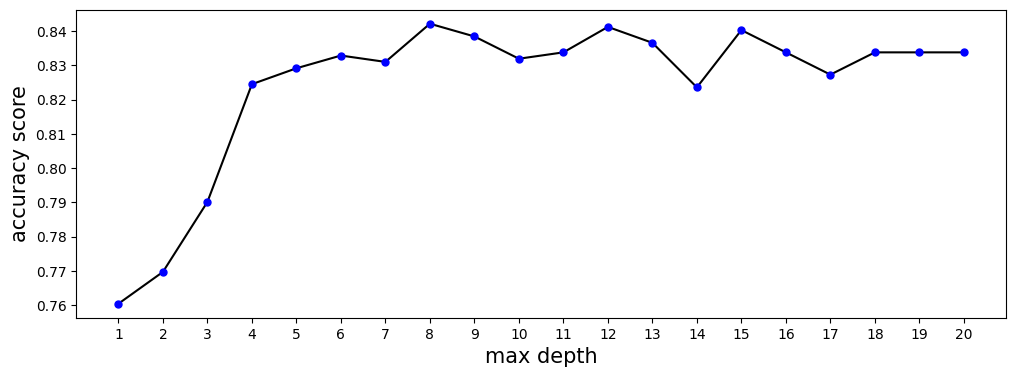

In [34]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 4)
ax.plot(depths, accuracies, '-', color="black", ms=10)
ax.plot(depths, accuracies, 'o', color="blue", ms=5)
ax.set_xlabel("max depth", size=15)
ax.set_ylabel("accuracy score", size=15)
plt.xticks(depths)
plt.show()

In [43]:
clf1 = tree.DecisionTreeClassifier(max_depth=8, random_state=42)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred1))

0.8421541318477251


In [44]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
# Feature importances are provided by the fitted attribute feature_importances_ and
# they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.
importances = clf1.feature_importances_
forest_importances = pd.Series(importances, index=clf1.feature_names_in_)
forest_importances.sort_values(ascending=False)[:20]

COG3386    0.295761
COG1609    0.104068
COG2608    0.101182
COG1319    0.037602
COG0708    0.032816
COG0667    0.032151
COG2986    0.021985
GH14       0.017865
COG4258    0.017595
COG0628    0.016738
COG2085    0.016623
COG0262    0.015142
COG0395    0.013492
COG5001    0.012976
COG0147    0.012961
COG0620    0.012907
COG4303    0.012885
COG3019    0.011755
COG0711    0.010621
COG1670    0.010558
dtype: float64

# Traning and testing the random forest model

In [37]:
depths = [i for i in range(1, 20+1)]
accuracies = []

for depth in depths:
  clf2 = RandomForestClassifier(max_depth=depth, random_state=42)
  clf2.fit(X_train, y_train.values.ravel())
  y_pred2 = clf2.predict(X_test)
  accuracies.append(metrics.accuracy_score(y_test, y_pred2))

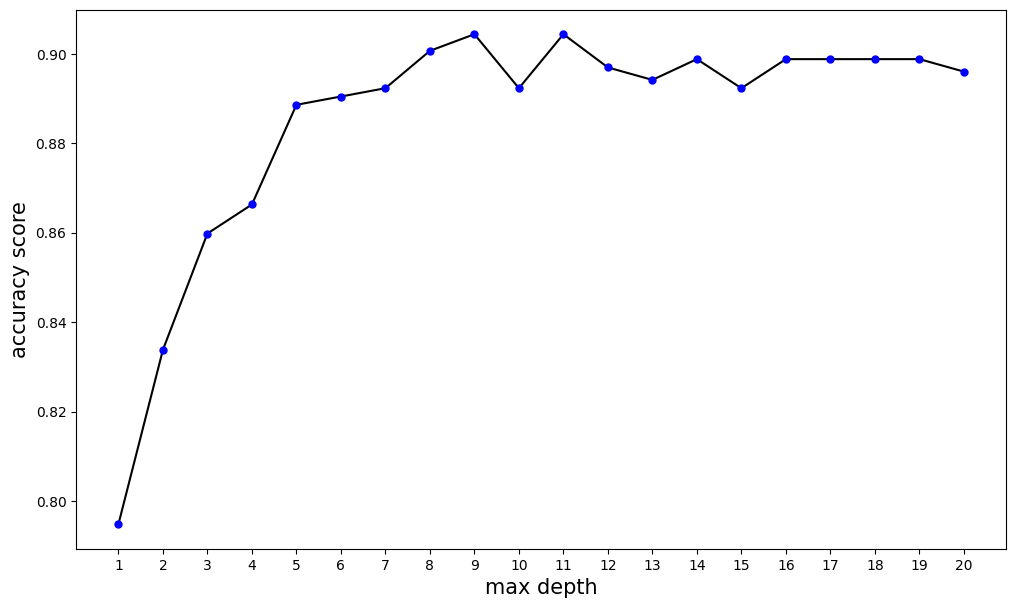

In [38]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 7)
ax.plot(depths, accuracies, '-', color="black", ms=10)
ax.plot(depths, accuracies, 'o', color="blue", ms=5)
ax.set_xlabel("max depth", size=15)
ax.set_ylabel("accuracy score", size=15)
plt.xticks(depths)
plt.show()

In [45]:
clf2 = RandomForestClassifier(max_depth=9, random_state=42)
clf2.fit(X_train, y_train.values.ravel())
y_pred2 = clf2.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred2))

0.904363974001857


In [50]:
importances = clf2.feature_importances_
forest_importances = pd.Series(importances, index=clf2.feature_names_in_)
forest_importances.sort_values(ascending=False)[:20]

COG1349    0.018595
COG3734    0.018301
COG0667    0.017699
COG3386    0.017123
COG1609    0.013536
COG1344    0.012221
COG0798    0.011974
COG2085    0.010238
COG3569    0.008888
COG0624    0.008758
COG1079    0.008383
COG0702    0.008370
COG1129    0.008238
COG4191    0.007755
COG0825    0.007642
COG0467    0.007229
COG0569    0.006875
COG3146    0.006856
COG2608    0.006593
COG4213    0.006281
dtype: float64

# Prediction on the soil bacteria using trained models

In [47]:
df = total[total["Classification"] == "soil"]
print(df.shape)
X = df[selected_features_2]
df["prediction1"] = clf1.predict(X)
df["prediction2"] = clf2.predict(X)
df[["taxonID", "Order", "Classification", "prediction1", "prediction2"]].head(20)

(511, 4564)


<ipython-input-47-19f1cb1400d9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["prediction1"] = clf1.predict(X)
<ipython-input-47-19f1cb1400d9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["prediction2"] = clf2.predict(X)


,taxonID,Order,Classification,prediction1,prediction2
3261,2534682017,Acinetobacter,soil,NPA,NPA
3262,2534682020,Acinetobacter,soil,NPA,NPA
3263,2576861110,Acinetobacter,soil,NPA,NPA
3264,648028004,Acinetobacter,soil,NPA,NPA
3265,2502894011,Actinobacteria,soil,NPA,NPA
3266,2504756050,Actinobacteria,soil,NPA,NPA
3267,2506783014,Actinobacteria,soil,NPA,NPA
3268,2506783048,Actinobacteria,soil,NPA,NPA
3269,2511231200,Actinobacteria,soil,NPA,NPA
3270,2513237387,Actinobacteria,soil,NPA,NPA


#Visualization of the tree

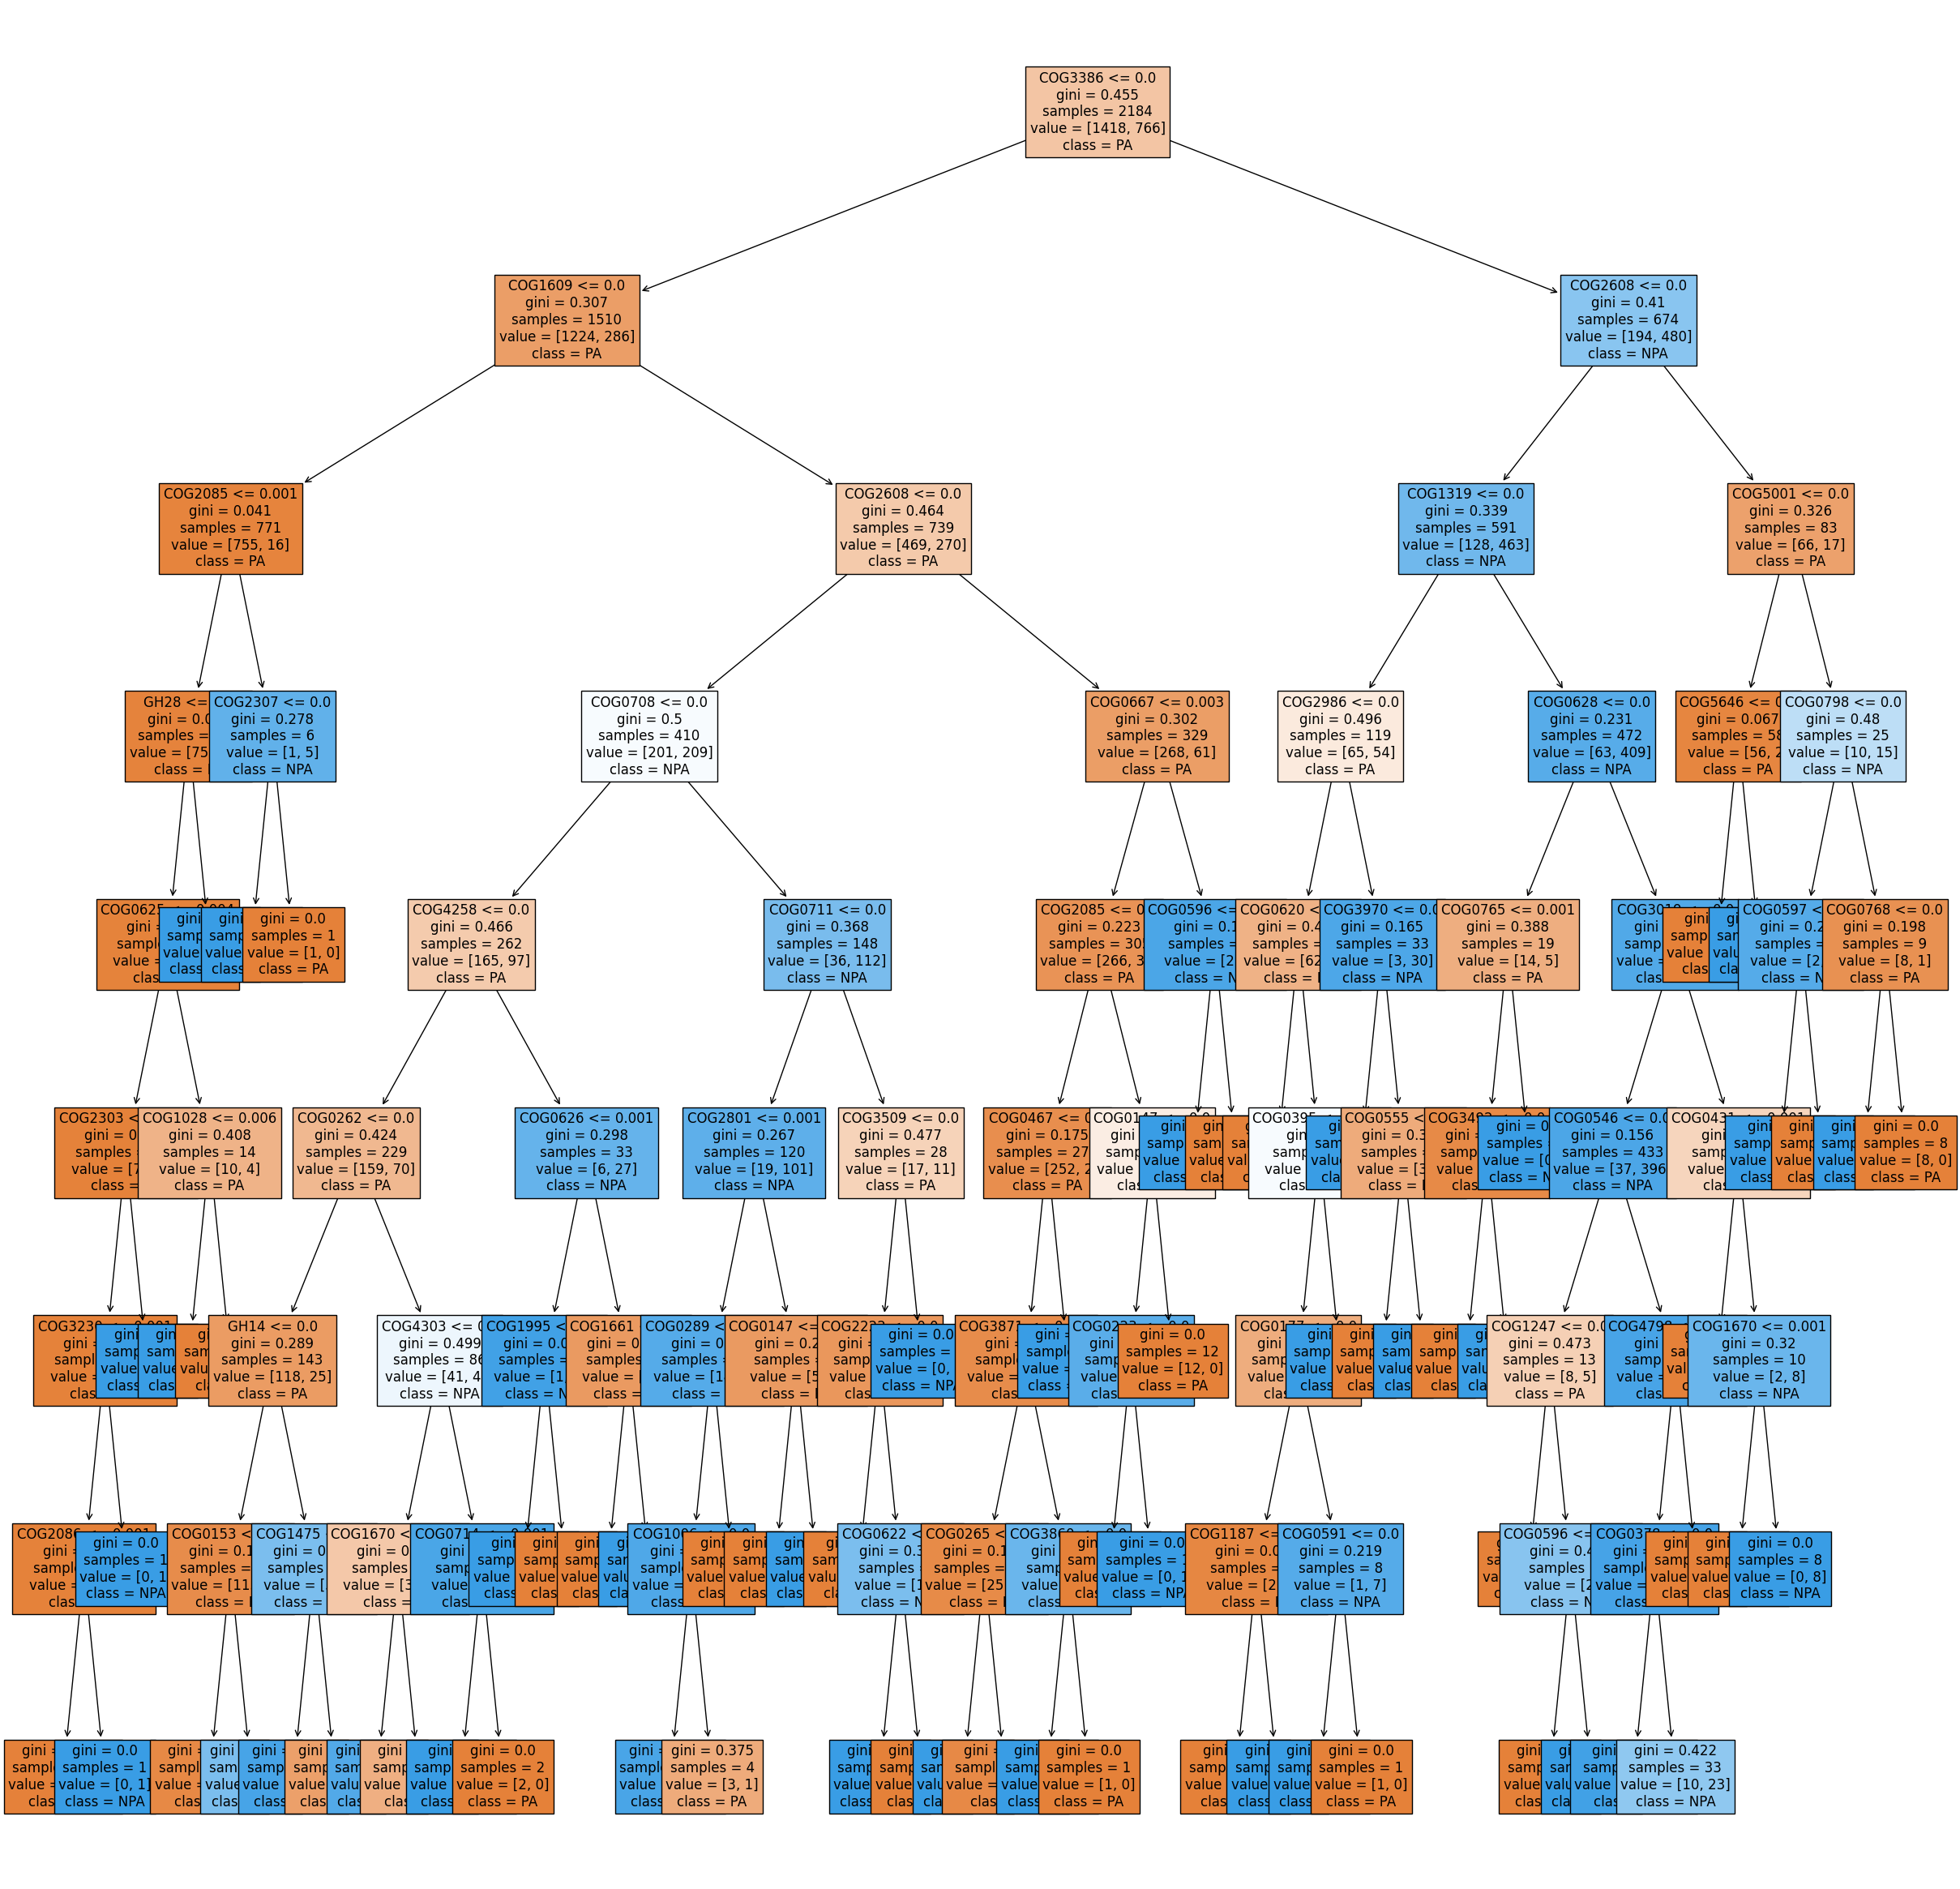

In [48]:
fig = plt.figure(figsize=(30,30))
tree.plot_tree(clf1, fontsize=12, feature_names=selected_features_2, class_names=["PA", "NPA"], filled=True)
plt.show()